$\color{yellow}{\text{Importy niezbędnych bibliotek}}$

In [1]:
import numpy as np
from scipy.integrate import quad_vec
from scipy import integrate
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

$\color{yellow}{\text{Zadanie 1}}$

Definiowanie funkcji i wyznaczonej analitycznie prawdziwej wartości

In [2]:
def f(x):
    return 4 / (1 + x ** 2)
real_value = np.pi

Funkcja szaczująca wartość całki metodami z laboratorium 6

In [3]:
def trapezoidal(m, f):
    x_values = np.linspace(0, 1, (2 ** m + 1))
    y_values = f(x_values)
    return integrate.trapz(y_values, x_values)

def simpson(m, f):
    x_values = np.linspace(0, 1, (2 ** m + 1))
    y_values = f(x_values)
    return integrate.simps(y_values, x_values)

def midpoint(m, f):
    x_values = np.linspace(0, 1, (2 ** m + 1))
    mid_x_values = (x_values[1:] + x_values[:-1]) / 2
    y_values = f(mid_x_values)
    h = x_values[1] - x_values[0]
    return np.sum(y_values * h)

def gauss_legendre(f, n, a = 0, b = 1):
    nodes, weights = roots_legendre(n)
    transformed_nodes = 0.5 * (nodes + 1) * (b - a) + a
    transformed_weights = 0.5 * (b - a) * weights
    return np.sum(transformed_weights * f(transformed_nodes))

ms = range(3, 15)

def calculate_integration_errors_lab6(real_value, f, ms):
    trapezoidal_error = []
    simpson_error = []
    midpoint_error = []
    gauss_errors = []
    eval_values = []

    for m in ms:
        eval_count = 2 ** m + 1
        eval_values.append(eval_count)

        trap_error = abs((real_value - trapezoidal(m, f)) / real_value)
        simp_error = abs((real_value - simpson(m, f)) / real_value)
        mid_error = abs((real_value - midpoint(m, f)) / real_value)
        gauss_error = abs((real_value - gauss_legendre(f, m)) / real_value)

        trapezoidal_error.append(trap_error)
        simpson_error.append(simp_error)
        midpoint_error.append(mid_error)
        gauss_errors.append(gauss_error)

    return eval_values, trapezoidal_error, simpson_error, midpoint_error, gauss_errors

```Podpunkt a```

Funkcja szacująca wartość całki motodami z laboratorium 7

In [4]:
tolerances = np.array(10 ** np.linspace(0, -14, 15))

def calculate_quad_errors_lab7(tolerances, f, real_value):
    results_trapezoidal = []
    results_gk = []
    evaluations_trapezoidal = []
    evaluations_gk = []

    for tolerance in tolerances:
        integral_trapezoidal, _, info_trapezoidal = quad_vec(
            f, 0, 1, epsabs=tolerance, quadrature='trapezoid', full_output=True
        )
        
        integral_gk, _, info_gk = quad_vec(
            f, 0, 1, epsabs=tolerance, quadrature='gk21', full_output=True
        )
        
        neval_trapezoidal = info_trapezoidal.neval
        neval_gk = info_gk.neval

        relative_error_trapz = abs((integral_trapezoidal - real_value) / real_value)
        relative_error_gk = abs((integral_gk - real_value) / real_value)

        results_trapezoidal.append(relative_error_trapz)
        results_gk.append(relative_error_gk)
        evaluations_trapezoidal.append(neval_trapezoidal)
        evaluations_gk.append(neval_gk)

    return results_trapezoidal, results_gk, evaluations_trapezoidal, evaluations_gk

Funkcja tworząca wspólny wykres wyników obliczeń motodami z laboratoriów 6 i 7

In [5]:
def plot_results(eval_values, trapezoidal_error, simpson_error, midpoint_error, gauss_errors, results_trapezoidal, results_gk, evaluations_trapezoidal, evaluations_gk, title = ''):
    plt.figure(figsize=(12, 8))
    plt.plot(evaluations_trapezoidal, results_trapezoidal, label='Adaptacyjna metoda trapezów', marker='o')
    plt.plot(evaluations_gk, results_gk, label='Adaptacyjna metoda Gaussa-Kronroda', marker='o')
    plt.plot(eval_values, trapezoidal_error, label='Metoda trapezów', marker='o')
    plt.plot(eval_values, simpson_error, label='Metoda Simpsona', marker='o')
    plt.plot(eval_values, midpoint_error, label='Metoda punktu środkowego', marker='o')
    plt.plot(eval_values, gauss_errors, label='Metoda Gaussa-Kronroda', marker='o')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Liczba ewaluacji funkcji')
    plt.ylabel('Wartość bezwzględna błędu względnego')
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

Obliczenia i tworzenie wykresu

In [6]:
# Dla laboratorium 6
eval_values, trapezoidal_error, simpson_error, midpoint_error, gauss_errors = calculate_integration_errors_lab6(real_value, f, ms)
# Dla laboratorium 7
results_trapezoidal, results_gk, evaluations_trapezoidal, evaluations_gk = calculate_quad_errors_lab7(tolerances, f, real_value)

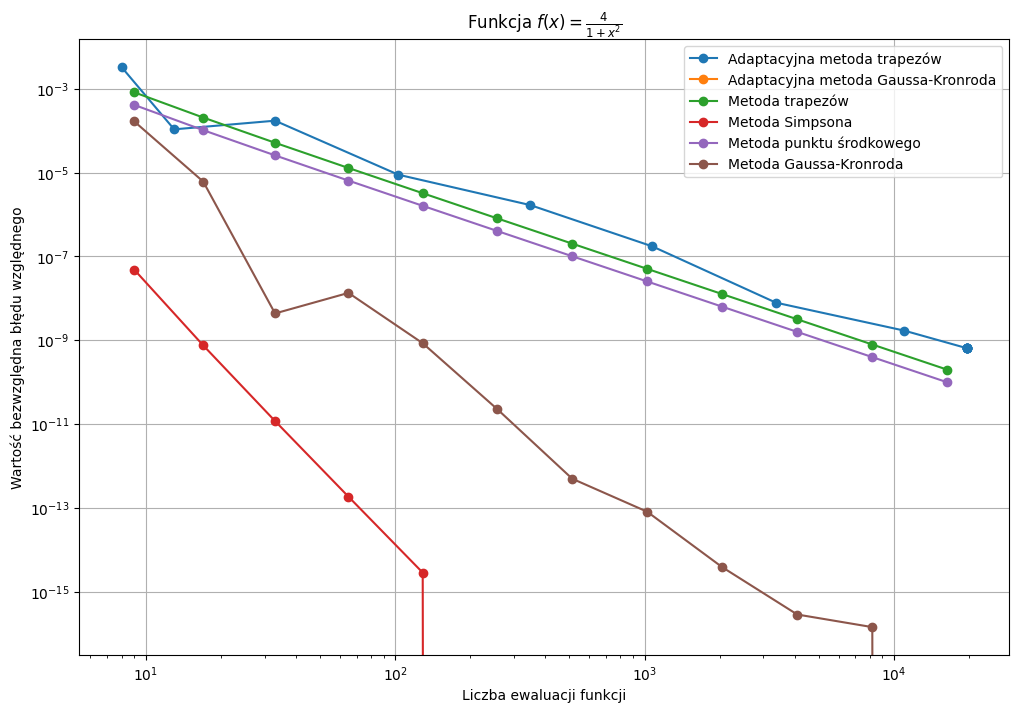

In [7]:
plot_results(eval_values, trapezoidal_error, simpson_error, midpoint_error, gauss_errors, results_trapezoidal, results_gk, evaluations_trapezoidal, evaluations_gk, r'Funkcja $f(x) = \frac{4}{1 + x^2}$')

$\color{yellow}{\text{Zadanie 2}}$ Powtórz obliczenia z poprzedniego oraz dzisiejszego laboratorium dla całek:

Definiowanie funkcji i wyznaczonej analitycznie prawdziwej wartości

In [8]:
def f2(x):
    epsilon = 1e-14  # bardzo mala wartosc, aby uniknąć log(0)
    return np.sqrt(x) * np.log(x + epsilon)

real_value2 = -4 / 9

```Podpunkt a```

Obliczenia i tworzenie wykresu

In [9]:
# Dla laboratorium 6
eval_values2a, trapezoidal_error2a, simpson_error2a, midpoint_error2a, gauss_errors2a = calculate_integration_errors_lab6(real_value2, f2, ms)
# Dla laboratorium 7
results_trapezoidal2a, results_gk2a, evaluations_trapezoidal2a, evaluations_gk2a = calculate_quad_errors_lab7(tolerances, f2, real_value2)

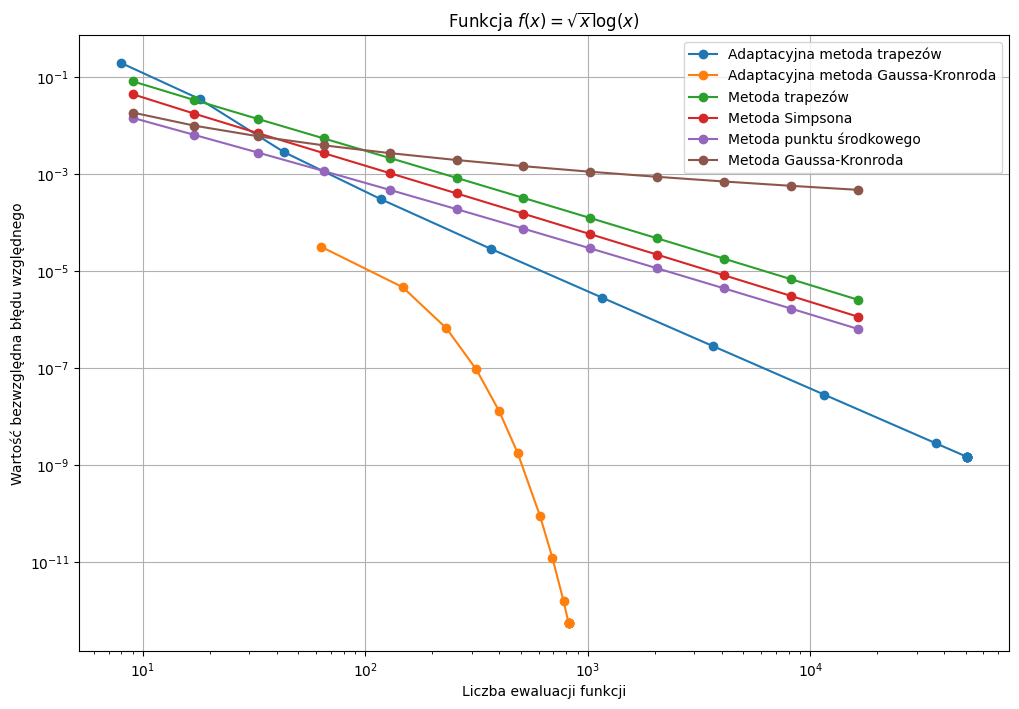

In [10]:
plot_results(eval_values2a, trapezoidal_error2a, simpson_error2a, midpoint_error2a, gauss_errors2a, results_trapezoidal2a, results_gk2a, evaluations_trapezoidal2a, evaluations_gk2a, r'Funkcja $f(x) = \sqrt{x} \log(x)$')

```Podpunkt b```

Definiowanie funkcji i wyznaczonej analitycznie prawdziwej wartości

In [11]:
def f3(x, a = 0.001, b = 0.004):
    return 1 / ((x - 0.3) ** 2 + a) + 1 / ((x - 0.9) ** 2 + b) - 6

def real_value_func(x0, a):
    return 1 / np.sqrt(a) * ( np.arctan((1-x0)/np.sqrt(a)) + np.arctan(x0/np.sqrt(a)) )

real_value3 = real_value_func(0.3, 0.001) + real_value_func(0.9, 0.004) - 6

Obliczenia i tworzenie wykresu

In [12]:
# Dla laboratorium 6
eval_values2b, trapezoidal_error2b, simpson_error2b, midpoint_error2b, gauss_errors2b = calculate_integration_errors_lab6(real_value3, f3, ms)
# Dla laboratorium 7
results_trapezoidal2b, results_gk2b, evaluations_trapezoidal2b, evaluations_gk2b = calculate_quad_errors_lab7(tolerances, f3, real_value3)

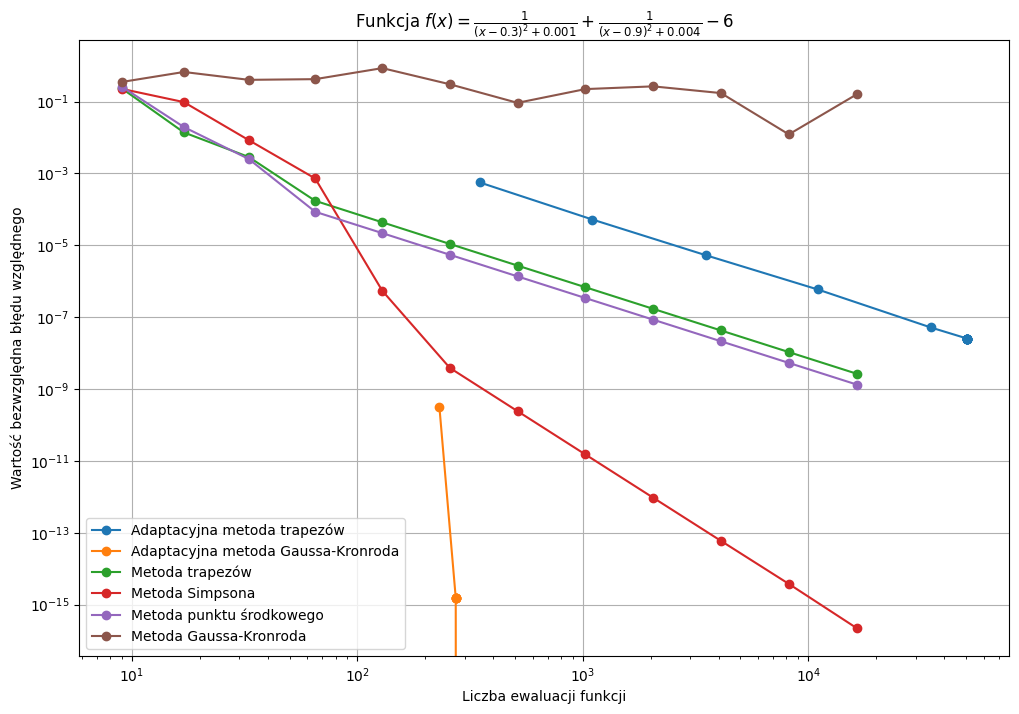

In [13]:
plot_results(eval_values2b, trapezoidal_error2b, simpson_error2b, midpoint_error2b, gauss_errors2b, results_trapezoidal2b, results_gk2b, evaluations_trapezoidal2b, evaluations_gk2b, r'Funkcja $f(x) = \frac{1}{(x - 0.3)^2 + 0.001} + \frac{1}{(x - 0.9)^2 + 0.004} - 6$')